In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\SMIT\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
X = data[["TV","radio","newspaper"]]
y = data["sales"]
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Sat, 27 Oct 2018   Prob (F-statistic):          2.43e-171
Time:                        10:41:29   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

((160, 3), (160L,))
((40, 3), (40L,))


In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.9052753234188304

In [8]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE",mean_squared_error(y_test,predictions))
print ("Variance Score",r2_score(y_test,predictions))

('MSE', 2.4348480810637567)
('Variance Score', 0.9052753234188304)


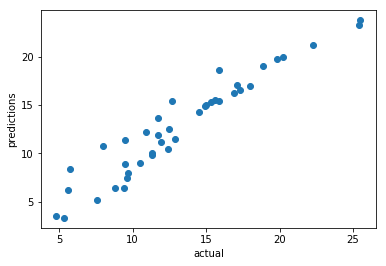

In [9]:
plt.scatter(y_test,predictions)
plt.xlabel('actual')
plt.ylabel('predictions')
plt.show()

In [10]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\SMIT\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
scores = cross_val_score(model, X, y, cv=3)
print (scores)

[0.90438089 0.86536009 0.9051984 ]


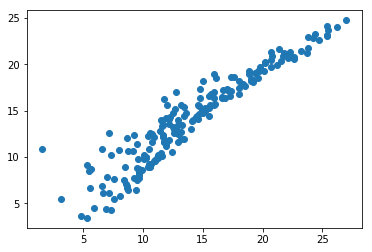

In [12]:
predictions = cross_val_predict(model, X, y, cv=3)
plt.scatter(y ,predictions)
plt.show()

In [13]:
metrics.r2_score(y, predictions)

0.8921836626454549